# **Inteligencia artificial**
La idea de replicar la inteligencia humana en máquinas ha hechizado a médicos, psicólogos, matemáticos e ingenieros. Gracias a esto, se han creado varias estrategias para crear sistemas capaces de decidir como lo haría un ser vivo, ya sea desde el punto conductista (aprendizaje condicionado como el experimento de Pavlov), hasta complejas teorías moleculares (modelo de Hodking-Huxley). \
Cuando en 1943 se creó la primer neurona artificial, el Perceptrón, la historia de la Inteligencia Artificial (IA) cambió para siempre: ya podíamos inspirarnos directamente por el cerebro. Después, el nacimiento de la segunda generación de redes neuronales (NN) trajo consigo nuevos modelos como la ADALINE, Kohonen, Back Propagation...Pero en nada se compara con la tercera generación, la que estamos viviendo hoy en día: el cómputo neuromórfico.\
Como salido de Neon Genesis Evangelion, se están creando sistemas que replican de manera muy similar a lo que pasa en el cerebro. Uno de estos sistemas con las redes neuronales del tipo spiking y los modelos de plasticidad neuronal.

#Spiking neuro
En este preciso momento estás leyendo este mensaje gracias a la inmensa conexión de miles y miles de neuronas y células gliales.
Pero no nos abrumemos, pensemos en la conexión entre dos neuronas, pensemos en la **sinápsis**.\
De manera simplista, las neuronas están compuestas por un **cuerpo celular**, que contiene al **núcleo**, lugar en donde de codifican las instrucciones de replicación y funcionamiento de la célula; por una larga cola llamada **axón**, que transmite los mensajes que dicta el núcleo; y por las **denditras**, ramificaciones que salen del cuerpo celular y tiene contacto con los axones de las demás neuronas, creando conexiones sinápticas.

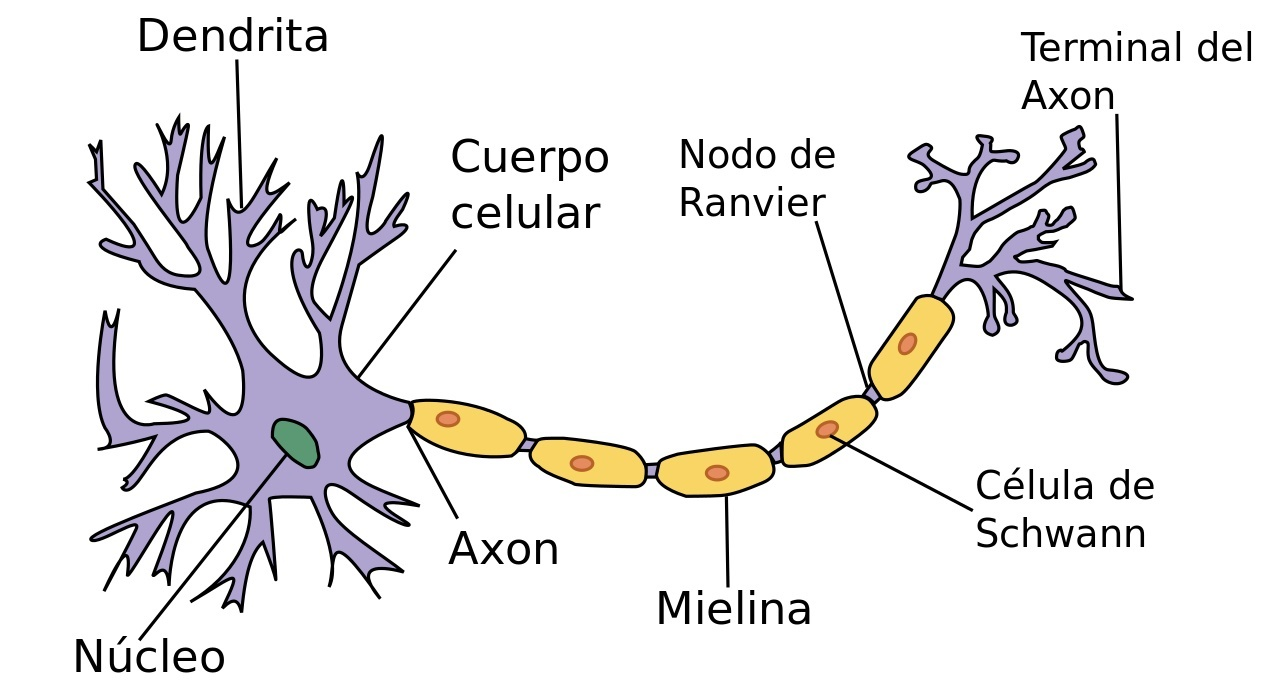



# Sinápsis


Las sinápsis funcionan a partir de un intercambio molecular cuya cantidad y frecuencia dependerá del mensaje que se quiere emitir. Hay laboratorios, por ejemplo, que miden la conexión de las neuronas pintando las proteínas de los canales iónicos. Pero existen otras investigaciones, como la nuestra, que estudia las conexiones sinápticas a partir de cambios eléctricos.\
Con la ayuda de microelectrodos se puede medir el cambio en la tensión de una neurona en reposo a una neurona en sinápsis. Este voltaje se representa con la ecuación:\
PONER ECUACION


In [ ]:
# Imports
try:
    import ipywidgets as widgets
except ImportError:
    widgets = None
    
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [ ]:
fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)
plt.close(fig)

# Function that runs the simulation
# tau: time constant (in ms)
# t0, t1, t2: time of three input spikes
# w: input synapse weight
# threshold: threshold value to produce a spike
# reset: reset value after a spike
def LIF(tau=10, t0=20, t1=40, t2=60, w=0.1, threshold=1.0, reset=0.0):
    # Spike times, keep sorted because it's more efficient to pop the last value off the list
    times = [t0, t1, t2]
    times.sort(reverse=True)
    # set some default parameters
    duration = 100 # total time in ms
    dt = 0.1 # timestep in ms
    alpha = np.exp(-dt/tau) # this is the factor by which V decays each time step
    V_rec = [] # list to record membrane potentials
    V = 0.0 # initial membrane potential
    T = np.arange(np.round(duration/dt))*dt # array of times
    spikes = [] # list to store spike times
    # run the simulation
    for t in T:
        V_rec.append(V) # record
        V *= alpha # integrate equations
        if times and t>times[-1]: # if there has been an input spike
            V += w
            times.pop() # remove that spike from list
        V_rec.append(V) # record V before the reset so we can see the spike
        if V>threshold: # if there should be an output spike
            V = reset
            spikes.append(t)
    # plot everything (T is repeated because we record V twice per loop)
    ax.clear()
    for t in times:
        ax.axvline(t, ls=':', c='b')
    ax.plot(np.repeat(T, 2), V_rec, '-k', lw=2)
    for t in spikes:
        ax.axvline(t, ls='--', c='r')
    ax.axhline(threshold, ls='--', c='g')
    ax.set_xlim(0, duration)
    ax.set_ylim(-1, 2)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('V')
    plt.tight_layout()
    display(fig);
    
# Create an interactive widget
widgets.interact(LIF,
    tau=widgets.IntSlider(min=1, max=100, value=50),
    t0=widgets.IntSlider(min=0, max=100, value=20),
    t1=widgets.IntSlider(min=0, max=100, value=40),
    t2=widgets.IntSlider(min=0, max=100, value=60),
    w=widgets.FloatSlider(min=-1, max=2, step=0.05, value=0.5),
    threshold=widgets.FloatSlider(min=0.0, max=2.0, step=0.05, value=1.0),
    reset=widgets.FloatSlider(min=-1.0, max=1.0, step=0.05, value=0.0),
    );

interactive(children=(IntSlider(value=50, description='tau', min=1), IntSlider(value=20, description='t0'), In…

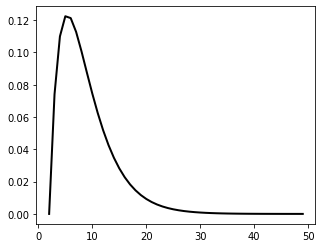

In [ ]:
#Spike
fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)
ax.clear()
plt.close(fig)

delta=2
sign=[2,6,9,17]
step=1
ti=sign[0];
tf=50

def spike(delta,step,ti,tf):
  tm=4; ts=10
  times=np.arange(ti,tf,step)
  alpha=[]
  for t in times:
    alpha.append(np.exp(-(t-delta)/tm)*(1-np.exp(-(t-delta)/ts))) # this is the factor by which V decays each time step

  times=np.arange(ti,tf,step)
  ax.plot(times,alpha,'-k', lw=2)
  display(fig);

spike(delta,step,ti,tf)

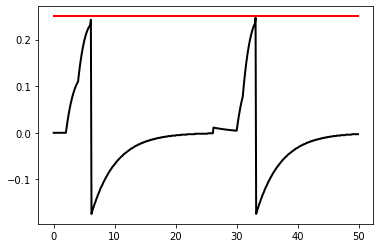

In [ ]:
#multiple spikes
import numpy as np
import matplotlib.pyplot as plt
plt.close('all')

sign=[2,4,6,30,31,33]
step=0.1
ti=sign[0];
tf=50
tm=4; ts=10
thr=0.25
def spike(thr,step,sign,tf):
    global times
    times=np.arange(0,tf,step)
    vec=np.zeros(np.size(times))
    ind=0
    for ti in sign:
        if ti>=ind:
            delta=ti
            for i in range(np.size(times)):
                t=times[i]
                if t>=ti and vec[i]>=0:  
                  vec[i]+=np.exp(-(t-delta)/tm)*(1-np.exp(-(t-delta)/ts)) 
                  if vec[i]>thr:
                      fall=np.arange(7,27,step)
                      for j in range(np.size(fall)):
                        #print(np.size(vec))
                        if i+j<500:
                            vec[i+j]=np.round(-np.exp(-fall[j]/tm),3)
                            if vec[i+j]<0:
                                ind=times[i+j]
                        else:
                            break
                        
                    
    plt.plot(times,vec,'-k', lw=2)
    plt.plot(times,thr*np.ones(np.size(times)),'r', lw=2)
    return vec,ti


vec,ti=spike(thr,step,sign,tf)


p
derecha
q
izquierda
p
derecha
q
izquierda
p
derecha
q
izquierda
p
derecha
a


KeyboardInterrupt: ignored

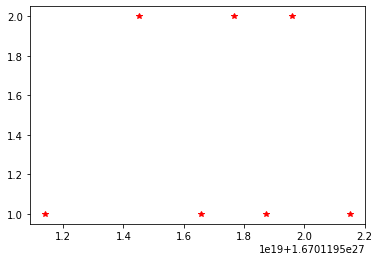

In [9]:
import matplotlib.pyplot as plt
import time
while True:
    t=time.time_ns()*1000000000
    command=input()
    if command=='p':
        print('derecha')
        value=1
        plt.plot(t,value,'r*')
        #derecha
    if command=='q':
        #izquierda
        print('izquierda')
        value=2
        plt.plot(t,value,'r*')
